In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv


In [3]:
pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.1 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.0.2 which 

In [28]:
import warnings
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore', category=FutureWarning)
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [5]:
#load the dataset
dataset=pd.read_csv('/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv')

In [6]:
dataset.shape

(426880, 28)

In [8]:
dataset.head()

Unnamed: 0          id                                                url  \
0      362773  7307679724  https://abilene.craigslist.org/ctd/d/abilene-2...   
1      362712  7311833696  https://abilene.craigslist.org/ctd/d/abilene-2...   
2      362722  7311441996  https://abilene.craigslist.org/ctd/d/abilene-2...   
3      362771  7307680715  https://abilene.craigslist.org/ctd/d/abilene-2...   
4      362710  7311834578  https://abilene.craigslist.org/ctd/d/abilene-2...   

    region                      region_url  price    year manufacturer  \
0  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
1  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
2  abilene  https://abilene.craigslist.org   4900  2006.0       toyota   
3  abilene  https://abilene.craigslist.org   6500  2008.0         ford   
4  abilene  https://abilene.craigslist.org   6500  2008.0         ford   

        model  condition  ...   type paint_color  \
0          x5        NaN  ...    NaN         NaN   
1          x5        NaN  ...    NaN         NaN   
2       camry  excellent  ...  sedan      silver   
3  expedition        NaN  ...    NaN         NaN   
4  expedition        NaN  ...    NaN         NaN   

                                           image_url  \
0  https://images.craigslist.org/00m0m_iba78h8ty9...   
1  https://images.craigslist.org/00m0m_iba78h8ty9...   
2  https://images.craigslist.org/00808_5FkOw2aGjA...   
3  https://images.craigslist.org/00M0M_i9CoFvVq8o...   
4  https://images.craigslist.org/00M0M_i9CoFvVq8o...   

                                         description county state        lat  \
0  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx  32.401556   
1  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx  32.401556   
2  2006 TOYOTA CAMRY LE Sedan   Ready To Upgrade ...    NaN    tx  32.453848   
3  $6500.00 2008 Ford Expedition  8 cylinder 5.4L...    NaN    tx  32.401556   
4  $6500.00 2008 Ford Expedition  8 cylinder 5.4L...    NaN    tx  32.401556   

        long               posting_date               removal_date  
0 -99.884713  2021-04-16 00:00:00+00:00  2021-05-02 00:00:00+00:00  
1 -99.884713  2021-04-24 00:00:00+00:00  2021-04-28 00:00:00+00:00  
2 -99.787900  2021-04-23 00:00:00+00:00  2021-05-25 00:00:00+00:00  
3 -99.884713  2021-04-16 00:00:00+00:00  2021-04-26 00:00:00+00:00  
4 -99.884713  2021-04-24 00:00:00+00:00  2021-05-12 00:00:00+00:00  

[5 rows x 28 columns]

In [50]:
# Convert 'posting_date' column to datetime
dataset['posting_date'] = pd.to_datetime(dataset['posting_date'])

In [17]:
dataset.type

posting_date
2021-04-16 00:00:00+00:00      NaN
2021-04-24 00:00:00+00:00      NaN
2021-04-23 00:00:00+00:00    sedan
2021-04-16 00:00:00+00:00      NaN
2021-04-24 00:00:00+00:00      NaN
                             ...  
2021-04-15 00:00:00+00:00      SUV
2021-04-30 00:00:00+00:00      bus
2021-04-30 00:00:00+00:00    truck
2021-05-03 00:00:00+00:00      NaN
2021-04-17 00:00:00+00:00      SUV
Name: type, Length: 426880, dtype: object

In [20]:
#columns to drop
columns_drop=['Unnamed:0','url','region_url','VIN','image_url','removal_date','lat','long']
#dropping only the columns existing in the dataframe
columns_existing=[i for i in columns_drop if i in dataset.columns]
#dropping the columns
dataset=dataset.drop(columns=columns_existing)


dataset.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'description',
       'county', 'state'],
      dtype='object')

In [21]:
#checking missing values
dataset.isnull().sum()

Unnamed: 0           0
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
description         70
county          426880
state                0
dtype: int64

In [23]:
#handlinng missing values
def missing_values_handling(dataset):
    # Handling numerical data
    numeric_data = ['year', 'odometer']
    dataset[numeric_data] = dataset[numeric_data].fillna(dataset[numeric_data].median())

    # Handling categorical data
    categorical_data = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'description', 'county']
    for column in categorical_data:
        dataset[column] = dataset[column].fillna('Unknown')  # Replace with 'Unknown' or another appropriate value

    return dataset

# Example usage
dataset = pd.DataFrame(dataset)  # Replace with your dataset
dataset = missing_values_handling(dataset)

In [24]:
#looking for any remaining null values
dataset.isnull().sum()

Unnamed: 0      0
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
county          0
state           0
dtype: int64

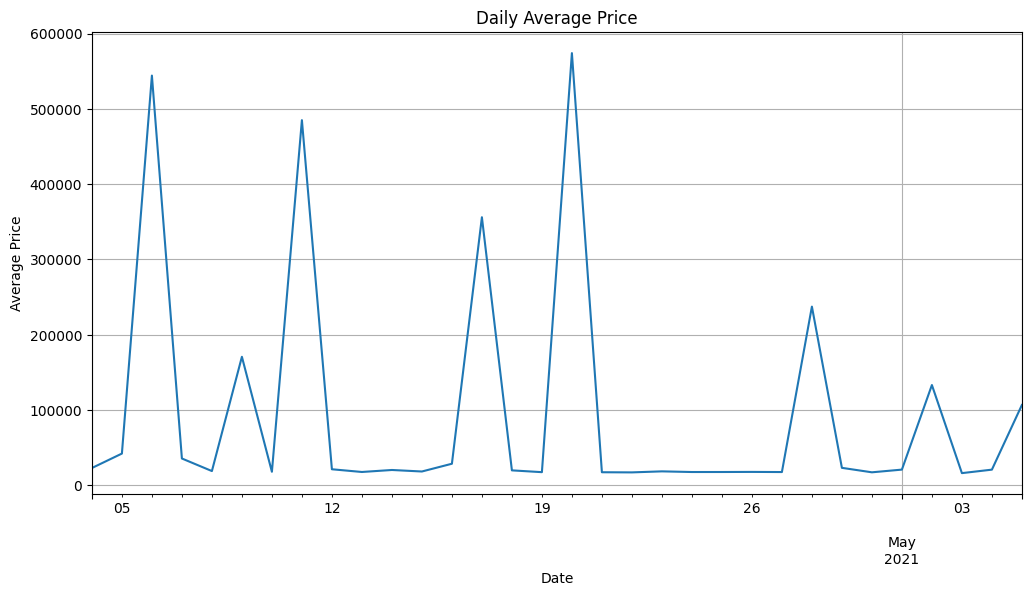

In [19]:
# Resample the data on a daily frequency and calculate the daily average price
daily_average_price = dataset['price'].resample('D').mean()

# Plot the daily average price
plt.figure(figsize=(12, 6))
daily_average_price.plot()
plt.title('Daily Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

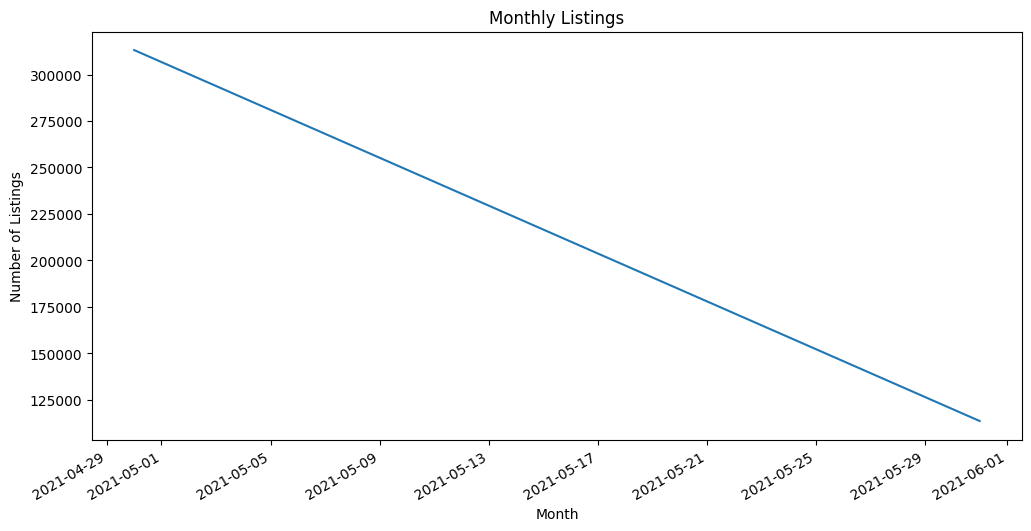

ValueError: Could not interpret input 'region'

In [29]:
# Explore temporal patterns
plt.figure(figsize=(12, 6))
dataset.resample('M').size().plot(legend=False)
plt.title('Monthly Listings')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.show()

# Analyze demand-supply dynamics by region and vehicle type
sns.countplot(x='region', dataset=dataset, order=dataset['region'].value_counts().index)
plt.title('Listings by Region')
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='manufacturer', dataset=dataset, order=dataset['manufacturer'].value_counts().index)
plt.title('Listings by Manufacturer')
plt.xticks(rotation=90)
plt.show()

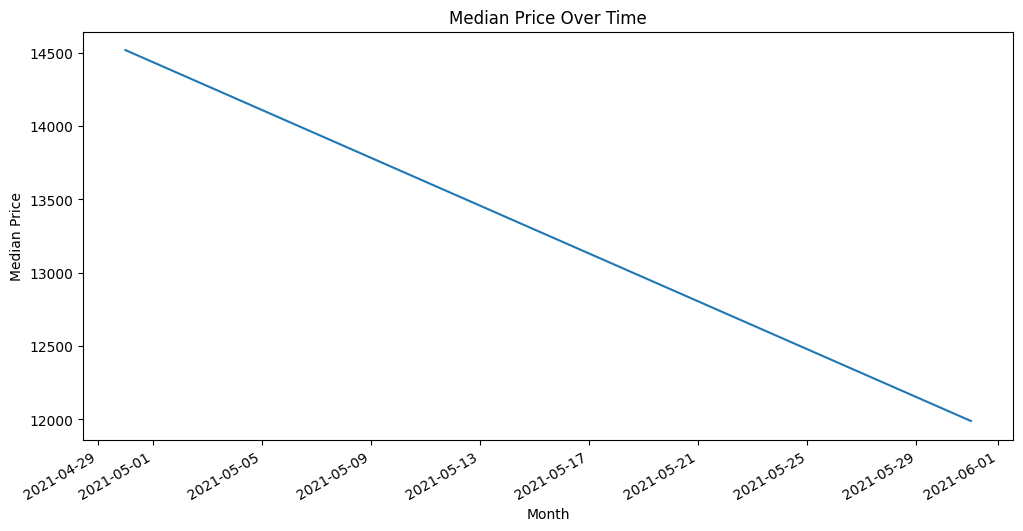

In [30]:
plt.figure(figsize=(12, 6))
dataset['price'].resample('M').median().plot(legend=False)
plt.title('Median Price Over Time')
plt.xlabel('Month')
plt.ylabel('Median Price')
plt.show()

In [34]:
date_rng = pd.date_range(start='2021-04-16', end='2021-04-17', freq='D')
dataset = np.sin(np.arange(len(date_rng)) / 30) + np.random.normal(0, 0.2, len(date_rng))
ts = pd.Series(dataset, index=date_rng)

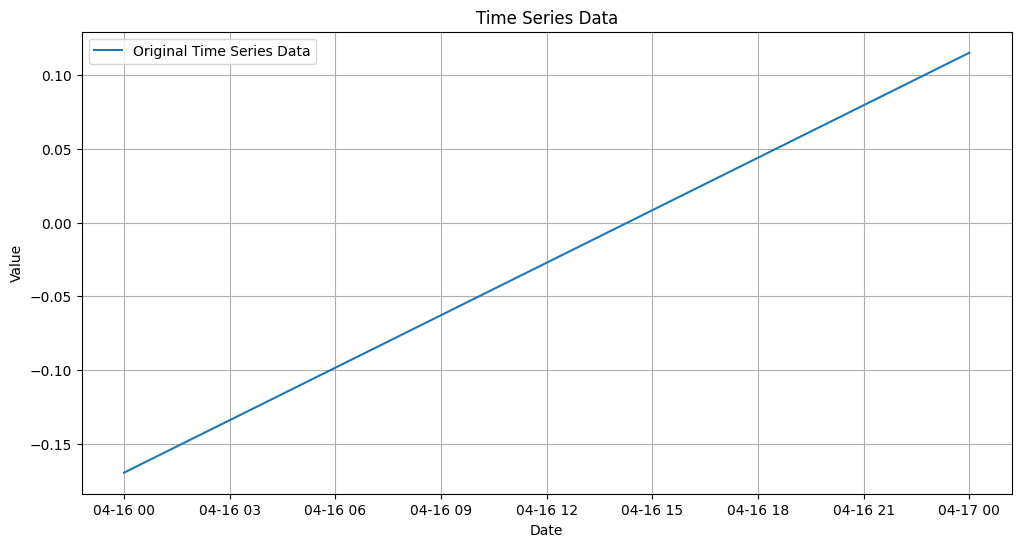

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [44]:
type(dataset)

numpy.ndarray

In [48]:
dataset=pd.read_csv('/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv')
dataset.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

In [39]:
# Fit an ARIMA model
model = ARIMA(ts, order=(5, 1, 0))
model_fit = model.fit()

# Make forecasts
forecast_steps = 30  # Number of steps to forecast into the future
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted values
forecast_date_rng = pd.date_range(start=ts.index[-1], periods=forecast_steps, freq='D')

# Visualize the original data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series Data')
plt.plot(forecast_date_rng, forecast, color='red', label='ARIMA Forecast')
plt.fill_between(forecast_date_rng, forecast - stderr, forecast + stderr, color='pink', alpha=0.3)
plt.title('ARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [57]:
def convert_tz_aware(posting_date):
    if not posting_date.tzinfo:
        return posting_date.replace(tzinfo=pytz.utc)
    else:
        return posting_date

dataset['posting_date'] = dataset['posting_date'].apply(convert_tz_aware)

dataset_new = dataset.groupby([ 'type','region', 'posting_date']).size().reset_index(name='count')

dataset_new = dataset_new.sort_values(by='posting_date')



In [59]:
dataset_new.head()

type        region              posting_date  count
22010  hatchback        monroe 2021-04-04 00:00:00+00:00      2
17255      coupe  rhode island 2021-04-04 00:00:00+00:00      3
54657      truck      richmond 2021-04-04 00:00:00+00:00      3
47414      sedan       redding 2021-04-04 00:00:00+00:00      7
57050        van         chico 2021-04-04 00:00:00+00:00      1

In [61]:
import plotly.express as px

# Create a time-series chart
fig = px.line(dataset_new, x='posting_date', y='count', color='region', line_group='type',
              title='Number of Vehicles Over Time by Type and Region',
              labels={'count': 'Number of Vehicles'},
               color_discrete_sequence=px.colors.qualitative.Set1)  # Change the color scale)

# Customize the layout
fig.update_layout(
    xaxis_title='Posting Date',
    yaxis_title='Number of Vehicles',
    showlegend=True,
)

fig.show()